## 1


In [1]:
from lab4.digraph_generator import generate_digraph_by_probability

graph = generate_digraph_by_probability(7, 0.3)

graph

{0: [4, 6], 1: [2], 2: [0, 3, 5, 6], 3: [0, 2, 6], 4: [0], 5: [0], 6: []}

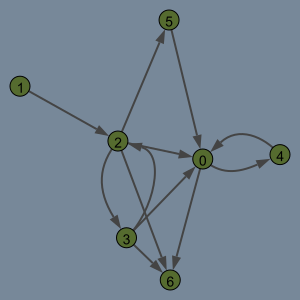

In [2]:
import igraph

# Dictionary representation of graph with weights
g = igraph.Graph(directed=True)

# add vertices to the graph
g.add_vertices(list(range(len(graph))))

# add edges to the graph
for vertex, neighbors in graph.items():
    for neighbor in neighbors:
        g.add_edge(vertex, neighbor)

igraph.plot(g, vertex_label=graph.keys(), vertex_color='Dark Olive Green', edge_width=2, background='Light Slate Gray',
            bbox=(300, 300))

# [5, 4, 6, 2, 0, 1, 3]

## 2


In [3]:
from lab4.digraph_components import find_connected_components

connected_components = find_connected_components(graph)
print(connected_components)

[[1], [3, 2], [5], [4, 0], [6]]


## 3


6->0->None
5->None
4->0->None
3->None
2->None
1->None
0->None


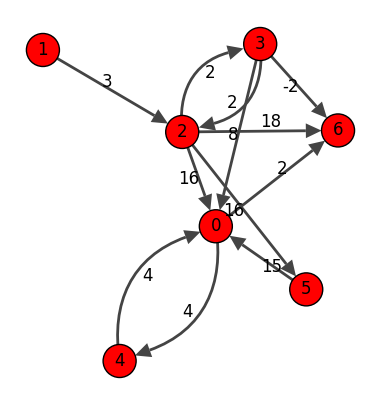

In [6]:
from lab4.digraph_bellman_ford import bellman_ford, assign_edge_weight
import matplotlib.pyplot as plt

g, w = assign_edge_weight(graph, -5, 20)

bellman_ford(g,w,0)

fig, ax = plt.subplots(figsize=(5, 5))

gr = igraph.Graph(directed = True)
gr.add_vertices(list(g.keys()))

for u,n in g.items():
    for v in n:
        if w[u][v] != None:
            gr.add_edge(u,v,weight = w[u][v])

gr.es['weight'] = [e['weight'] for e in gr.es]
layout = gr.layout("kk")

igraph.plot(gr, target=ax, layout = layout, vertex_label = g.keys() ,edge_label = gr.es['weight'])

plt.show()